<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Artificial%20Neural%20Network/artificial_neural_network_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network, 


***ABSTRACT***

***This is a hands-on practice of building an Artificial Neural Network (ANN) with Keras/Tensorflow to train the [Boston Dataset](https://www.kaggle.com/c/boston-housing). we load the dataset from Sklearn library and pre-process the data with StandardScaler function. We then build an Artificial Neural Network (ANN) with Keras library, train it and evaluate the results. At last we also build a Linear Regression model with Sklearn library processing the same dataset, and compare its results with ANN, we find out that ANN with one hidden layer is not as good as Linear Regression mode, as we add more hidden layers for the ANN the results are getting better, eventually we build the ANN with four hidden layers with 64, 128, 128, 64 units we get a better results than Linear Regression.***






In [0]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Boston Dataset

### 1.1 Load the dataset

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

### 1.2 Scale the data and split it to training and testing set

In [0]:
X = boston.data
y = boston.target

sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(boston.data.shape)
print(boston.target.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(506, 13)
(506,)
(404, 13) (404,)
(102, 13) (102,)


## 2. Artificial Neural Network

### 2.1 Build Artificial Neural Network

We build an ANN with Keras/Tensorflow, the input shape is the number of features of Boston Dataset, which is X_train.shape[0], there are 4 hidden layers with 64, 128, 128, 64 units respectively, the activation function for is **ReLU**. The output of the ANN has one unit which will output a linear number.


**ReLU** function is defined as $y = max(0, x)$, shown as below,

<img src="https://github.com/jchen8000/MachineLearning/blob/master/images/Relu.png?raw=true" alt="drawing" width="350"/>



In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

#build our model
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


### 2.2 Train the ANN Model

In [7]:
history = model.fit(
                      X_train,
                      y_train,
                      epochs=100,
                      shuffle=True,
                      verbose=2,
                      validation_data=(X_test, y_test)
                  )

Instructions for updating:
Use tf.cast instead.
Train on 404 samples, validate on 102 samples
Epoch 1/100
 - 0s - loss: 516.4378 - mean_absolute_error: 20.7972 - val_loss: 383.1477 - val_mean_absolute_error: 17.3509
Epoch 2/100
 - 0s - loss: 234.6253 - mean_absolute_error: 12.8157 - val_loss: 105.1563 - val_mean_absolute_error: 7.9658
Epoch 3/100
 - 0s - loss: 74.8315 - mean_absolute_error: 6.4464 - val_loss: 70.2000 - val_mean_absolute_error: 6.1063
Epoch 4/100
 - 0s - loss: 37.8397 - mean_absolute_error: 4.4366 - val_loss: 58.5995 - val_mean_absolute_error: 5.5284
Epoch 5/100
 - 0s - loss: 27.0983 - mean_absolute_error: 3.7248 - val_loss: 49.8480 - val_mean_absolute_error: 5.0127
Epoch 6/100
 - 0s - loss: 23.6673 - mean_absolute_error: 3.4645 - val_loss: 43.0156 - val_mean_absolute_error: 4.6517
Epoch 7/100
 - 0s - loss: 20.3055 - mean_absolute_error: 3.2114 - val_loss: 39.4984 - val_mean_absolute_error: 4.4488
Epoch 8/100
 - 0s - loss: 17.8239 - mean_absolute_error: 3.0355 - val_los

In [8]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


### 2.3 Analyze the result

Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root mean squared error (RMSE) are the most common metrics used to measure accuracy for continuous variables. 

*   Mean Absolute Error (MAE)
$$ MAE = \frac{\mathrm{1} }{m}  \sum_{i=1}^{m} \left|y_i-\hat{y}_i\right| $$


*    Mean Squared Error (RMSE): 
$$ MSE = \frac{\mathrm{1} }{m}  \sum_{i=1}^{m} (y_i-\hat{y}_i)^2 $$

*   Root mean squared error (RMSE): 

$$ RMSE =  \sqrt{ \frac{\mathrm{1} }{m}  \sum_{i=1}^{m} (y_i-\hat{y}_i)^2 }$$


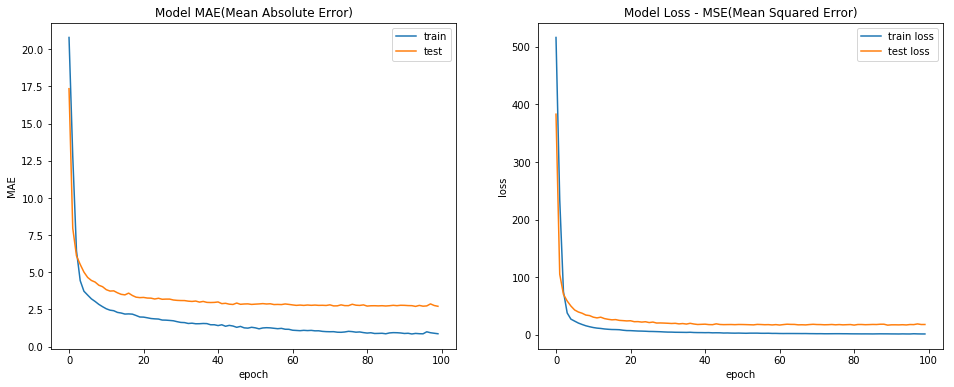

In [9]:
fig = plt.figure(1, figsize=(16,6))

plt.subplot(1, 2, 1)
plt.title('Model MAE(Mean Absolute Error)')
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss - MSE(Mean Squared Error)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

plt.show()

In [10]:
val_mse, val_mae = model.evaluate(X_test, y_test, verbose=0)
print("MSE(Mean Squared Error): ", val_mse)
print("MAE(Mean Absolute Error): ", val_mae)

MSE(Mean Squared Error):  17.820838872124167
MAE(Mean Absolute Error):  2.7109944493162867


### 2.4 Make predictions and visualize it 


We use R-squared Score or, $ R ^{2} $ score, to evaluate how good our regression model is.

$$ R ^{2} \equiv 1 - \frac{ \sum_{i} ( \hat{y} - \overline{y})^2}{ \sum_{i} ( y_i - \overline{y})^2}  = 1 - \frac{residual  sum  of  squares}{total  sum  of  squares } $$ 


* $ y_i $ are the ground truth values, 
* $ \hat{y}_i $ are predicted values, 
* $ \overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_i $, 

In [0]:
predictions = model.predict(X_test)

In [0]:
from sklearn.metrics import r2_score
R2_score = r2_score(y_test, predictions)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$, R2 Score: 0.781147')

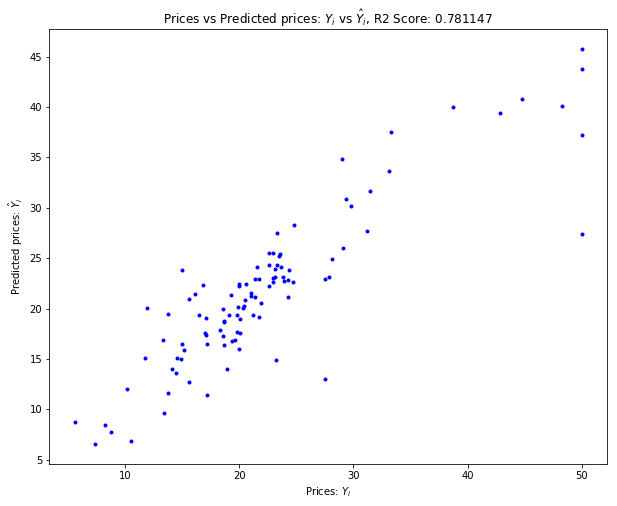

In [13]:
plt.figure(1, figsize=(10,8))
plt.scatter(y_test, predictions, marker='.', c="b")
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$, R2 Score: %f" % R2_score)

In [14]:
print( "R-squared Score is: ", R2_score)

R-squared Score is:  0.7811472397048984


## 3. Compare with Linear Regression of sklearn

### 3.1 Build Linear Regression model with Sklearn

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3.2 Evaluate the results of Linear Regression

In [16]:
y_pred = lr.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("MSE(Mean Squared Error): ", mse)
print("MAE(Mean Absolute Error): ", mae)


MSE(Mean Squared Error):  33.44897999767653
MAE(Mean Absolute Error):  3.8429092204444983


In [0]:
R2_score = r2_score(y_test, y_pred)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$, R2 Score: 0.589222')

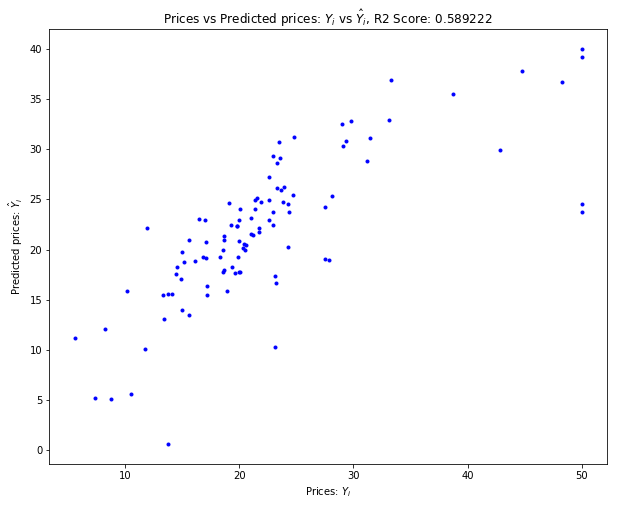

In [18]:
plt.figure(1, figsize=(10,8))
plt.scatter(y_test, y_pred, marker='.', c="b")
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$, R2 Score: %f" % R2_score)

In [19]:
print( "R-squared Score is: ", R2_score) 

R-squared Score is:  0.5892223849182507


# 4. Conclusion

If we use Sklearn Linear Regression model we get the result of 
*  MSE(Mean Squared Error):  33.44897999767653
*  MAE(Mean Absolute Error):  3.8429092204444983


If we use Artificial Neural Network with one hidden layer of 64 units, we get a result worse than linear regression.
*  MSE(Mean Squared Error):  44.32422247119978
*  MAE(Mean Absolute Error):  4.781989939072552

As we keep adding the hidden layers we get better results, with 4 hidden layers of 64, 128, 128, 64 units, we get the result of,
*  MSE(Mean Squared Error):  16.186641019933365
*  MAE(Mean Absolute Error):  2.652294722257876


# 5. Others

## 5.1 Some Activation Functions commonly used for Neural Network

**LeakyReLU (Leaky ReLU):**

<img src="https://github.com/jchen8000/MachineLearning/blob/master/images/LeakyReLU.png?raw=true" alt="Leaky ReLU" width="350"/>


**ELU (Exponential Linear Unit):**

<img src="https://github.com/jchen8000/MachineLearning/blob/master/images/ExponentialLinear.png?raw=true" alt="ELU" width="350"/>


[References](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)